# 🧠 EDA & Visualization - Age & Gender Detection CNN Project

In [12]:
import sys
import os

sys.path.append(os.path.abspath("../"))  # Adjust if notebook is deeper

In [13]:
import pandas as pd
from src.utils.preprocessing import parse_image_metadata
from src.utils.visualize import plot_age_distribution, plot_gender_distribution, show_sample_images

dataset_path = "../data/UTKFace"
df = parse_image_metadata(dataset_path)
df.head()


100%|██████████| 23708/23708 [00:00<00:00, 304771.97it/s]


,image,age,gender
0,../data/UTKFace\100_0_0_20170112213500903.jpg....,100,0
1,../data/UTKFace\100_0_0_20170112215240346.jpg....,100,0
2,../data/UTKFace\100_1_0_20170110183726390.jpg....,100,1
3,../data/UTKFace\100_1_0_20170112213001988.jpg....,100,1
4,../data/UTKFace\100_1_0_20170112213303693.jpg....,100,1


## 📊 Distribution Plots

c:\Users\SKYMIL\Desktop\facial-age-gender-cnn\src\utils\visualize.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='pastel')


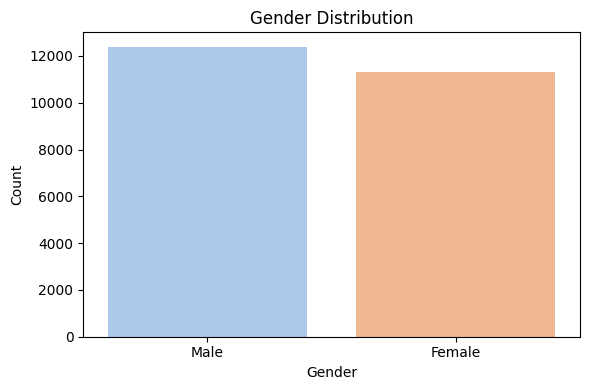

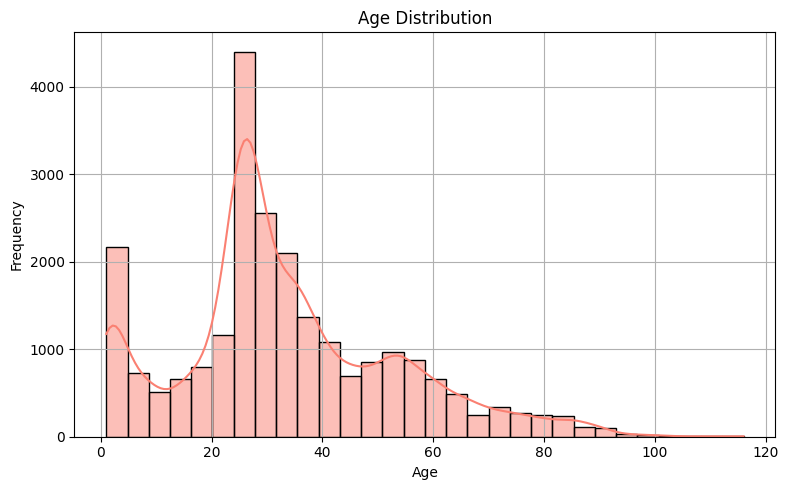

In [14]:
plot_gender_distribution(df)
plot_age_distribution(df)


## 🖼️ Sample Images

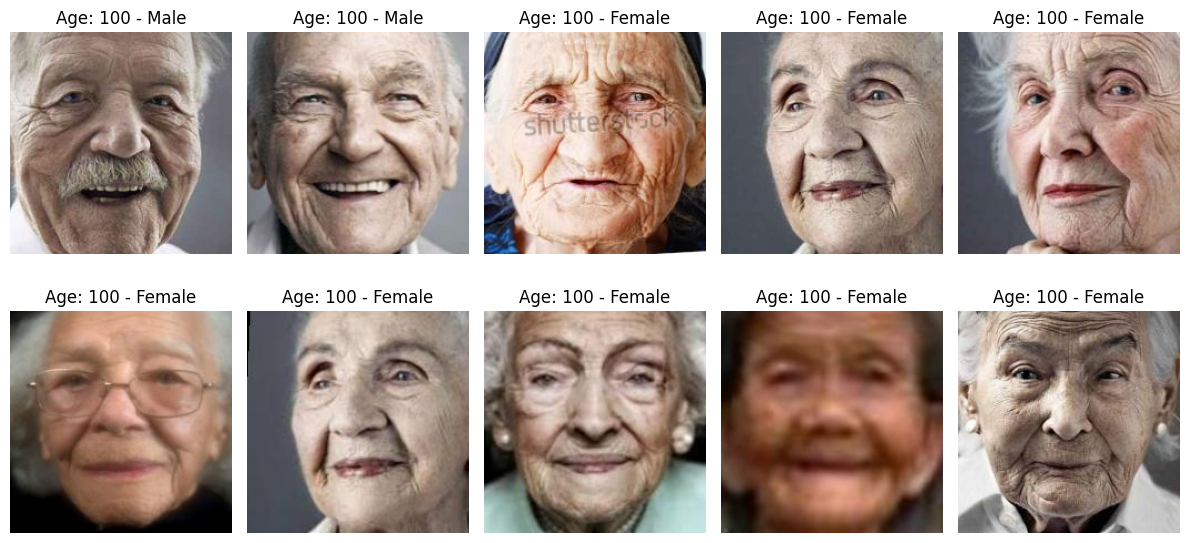

In [15]:
show_sample_images(df, num_images=10)

## 🔮 Model Prediction (Optional - Run After Training)

In [22]:
from tensorflow.keras.models import load_model
from src.utils.preprocessing import extract_features
from src.utils.evaluation import show_prediction
import numpy as np

# Load model
model = load_model("../outputs/models/best_model.h5", compile=False)

# Extract features
X = extract_features(df['image'])
y_gender = df['gender'].values
y_age = df['age'].values

# Show prediction for index 50
show_prediction(model, X, y_gender, y_age, idx=50)

 95%|█████████▌| 22633/23708 [00:20<00:00, 1102.35it/s]


KeyboardInterrupt: 

741/741 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step
Model Evaluation Metrics:

Gender Accuracy: 0.9518
Age MAE: 3.79
Age RMSE: 5.57
Age R² Score: 0.9216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Index: 3763
Actual: Male, 23
Predicted: Male, 21


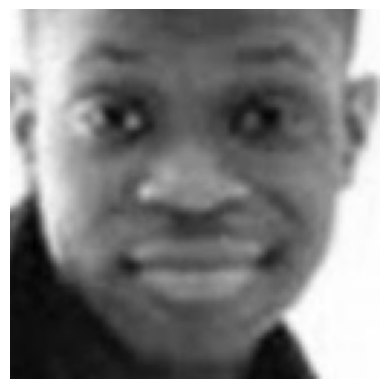

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Index: 15906
Actual: Male, 41
Predicted: Male, 33


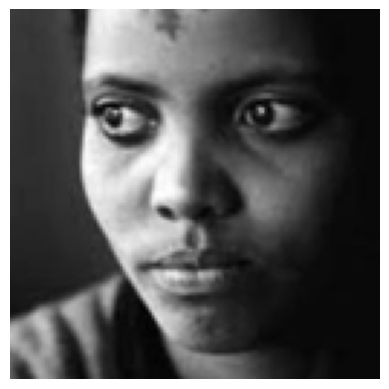

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Index: 2140
Actual: Male, 1
Predicted: Male, 3


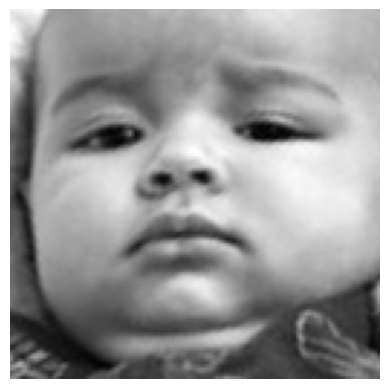

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Index: 4305
Actual: Male, 24
Predicted: Male, 22


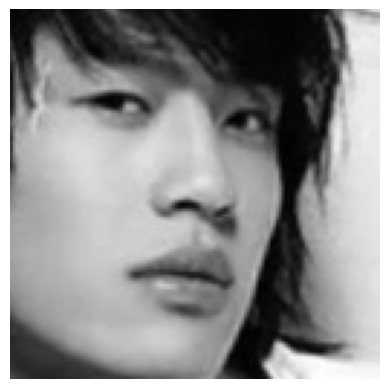

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Index: 15015
Actual: Female, 39
Predicted: Male, 36


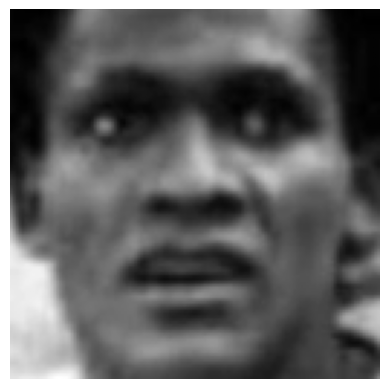

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import numpy as np
from src.utils.evaluation import plot_training_history


# --- 2. Predict on test set ---
y_pred_gender, y_pred_age = model.predict(X)

# Convert predictions
y_pred_gender_binary = np.round(y_pred_gender).astype(int).flatten()
y_true_gender = y_gender.flatten()
y_pred_age_flat = y_pred_age.flatten()
y_true_age = y_age.flatten()

# --- 3. Compute metrics ---
# Gender Classification
gender_acc = accuracy_score(y_true_gender, y_pred_gender_binary)

# Age Regression
mae = mean_absolute_error(y_true_age, y_pred_age_flat)
rmse = np.sqrt(mean_squared_error(y_true_age, y_pred_age_flat))
r2 = r2_score(y_true_age, y_pred_age_flat)

# --- 4. Print metrics ---
print("Model Evaluation Metrics:\n")
print(f"Gender Accuracy: {gender_acc:.4f}")
print(f"Age MAE: {mae:.2f}")
print(f"Age RMSE: {rmse:.2f}")
print(f"Age R² Score: {r2:.4f}")

# --- 5. Optional: Show random predictions ---
import random
for i in range(5):  # Show 5 sample predictions
    idx = random.randint(0, len(X) - 1)
    show_prediction(model, X, y_gender, y_age, idx)


741/741 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step


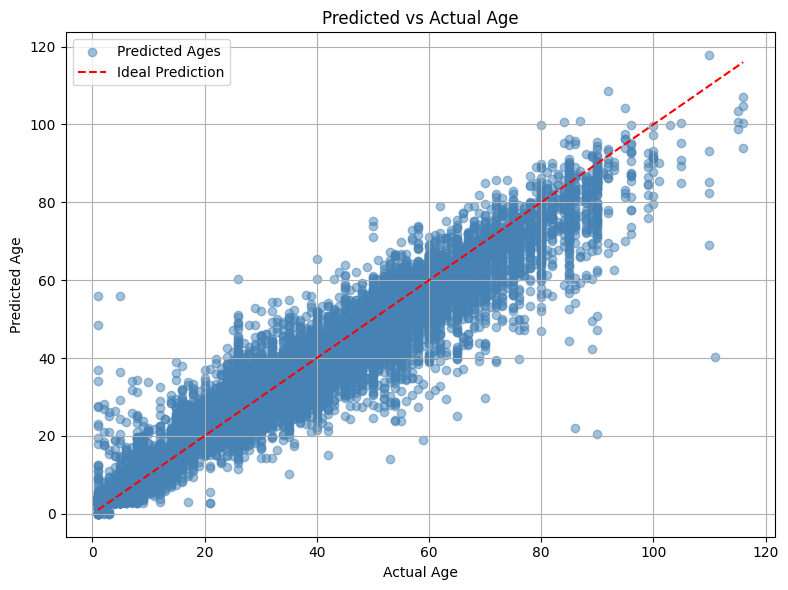

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are already defined
# y_true_age = true age labels from test set (e.g., y_test_age)
# y_pred_age = predicted age values from model (model.predict(...)[1])

# Flatten in case they're still 2D
y_true_age = y_age.flatten()
y_pred_age = model.predict(X)[1].flatten()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_true_age, y_pred_age, alpha=0.5, color='steelblue', label='Predicted Ages')
plt.plot([min(y_true_age), max(y_true_age)], [min(y_true_age), max(y_true_age)], color='red', linestyle='--', label='Ideal Prediction')

plt.title('Predicted vs Actual Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


741/741 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step


<Figure size 600x500 with 0 Axes>

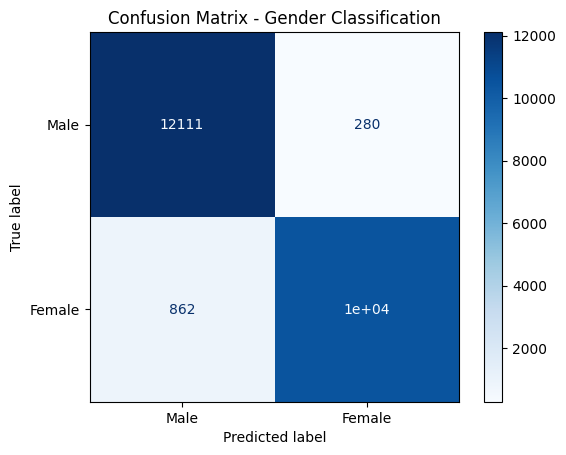

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predicted gender as binary labels
y_true_gender = y_gender.flatten()
y_pred_gender = np.round(model.predict(X)[0].flatten()).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_true_gender, y_pred_gender)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Male", "Female"])

# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Gender Classification")
plt.grid(False)
plt.show()
